# Import
---

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

# Data
---

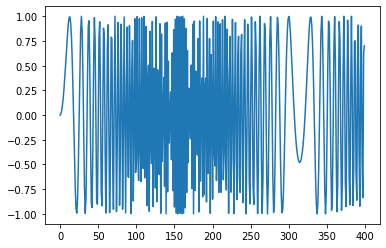

In [ ]:
# Make the data
series = np.sin((0.1*np.arange(400))**2)

# Plot it
plt.plot(series)
plt.show()

In [ ]:
# Use T past values to predict next
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)  # Make it N x T
Y = np.array(Y)
N = len(X)
print(X.shape, Y.shape)

(390, 10) (390,)


# Auto Regressive Linear Model
---

Epoch 1/80
7/7 [==============================] - 0s 20ms/step - loss: 0.8764 - val_loss: 0.7367
Epoch 2/80
7/7 [==============================] - 0s 5ms/step - loss: 0.8198 - val_loss: 0.6903
Epoch 3/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7697 - val_loss: 0.6494
Epoch 4/80
7/7 [==============================] - 0s 4ms/step - loss: 0.7260 - val_loss: 0.6130
Epoch 5/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6868 - val_loss: 0.5819
Epoch 6/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6543 - val_loss: 0.5561
Epoch 7/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6268 - val_loss: 0.5352
Epoch 8/80
7/7 [==============================] - 0s 4ms/step - loss: 0.6055 - val_loss: 0.5179
Epoch 9/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5875 - val_loss: 0.5045
Epoch 10/80
7/7 [==============================] - 0s 4ms/step - loss: 0.5734 - val_loss: 0.4946
Epoch 11/80
7/7 [=====================

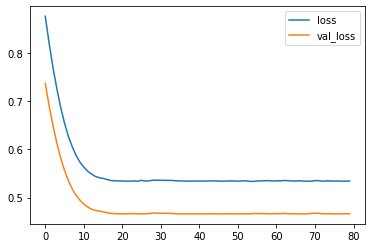

In [ ]:
# Build
i = Input(shape=(T, D))
x = Dense(1)(i)
model = Model(i, x)

# Compile
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.01)
)

# Train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:])
)

# Plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## One-Step forecast using true targets

(390, 10, 1)


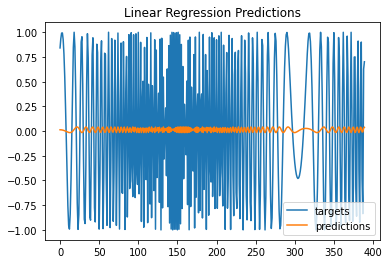

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title('Linear Regression Predictions')
plt.legend()

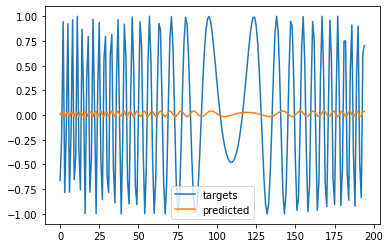

In [ ]:
# This is the code we had before - does the same thing
# One-Step forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2  # index of the first validation input

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0]  # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

plt.plot(validation_target, label='targets')
plt.plot(validation_predictions, label='predicted')
plt.legend()

## Multi-Step forecast

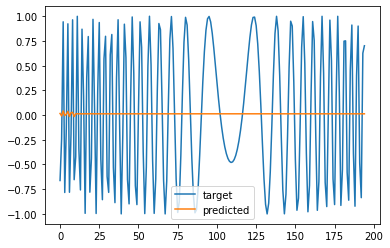

In [ ]:
validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]  # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0]  # 1x1 array -> scalar

  # Update predictions list
  validation_predictions.append(p)

  # Make the new input
  # print(f'\n=========================\n1-{last_x}')
  last_x = np.roll(last_x, -1)
  # print(f'2-{last_x}')
  last_x[-1] = p
  # print(f'3-{last_x}')

# Plot
plt.plot(validation_target, label='target')
plt.plot(validation_predictions, label='predicted')
plt.legend()

# RNN/LSTM Model
---

In [ ]:
X = X.reshape(-1, T, 1)  # make it N x T x D

Epoch 1/600
7/7 [==============================] - 0s 48ms/step - loss: 0.5342 - val_loss: 0.4684
Epoch 2/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5321 - val_loss: 0.4698
Epoch 3/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5295 - val_loss: 0.4713
Epoch 4/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5286 - val_loss: 0.4729
Epoch 5/600
7/7 [==============================] - 0s 7ms/step - loss: 0.5262 - val_loss: 0.4740
Epoch 6/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5249 - val_loss: 0.4752
Epoch 7/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5236 - val_loss: 0.4762
Epoch 8/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5229 - val_loss: 0.4768
Epoch 9/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5230 - val_loss: 0.4778
Epoch 10/600
7/7 [==============================] - 0s 6ms/step - loss: 0.5220 - val_loss: 0.4791
Epoch 11/600
7/7 [==========

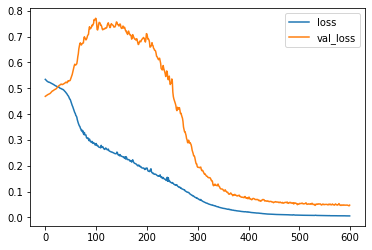

In [ ]:
# Build
i = Input(shape=(T, D))
x = LSTM(10, activation='tanh')(i)
# x = SimpleRNN(10, activation='tanh')(i)
x = Dense(1)(x)
model = Model(i, x)

# Compile
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.001)
)

# Train
r = model.fit(X[:-N//2], Y[:-N//2],
              validation_data=(X[-N//2:], Y[-N//2:]),
              epochs=600, batch_size=32)

# Plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

## One-Step forecast using true targets

(390, 1)


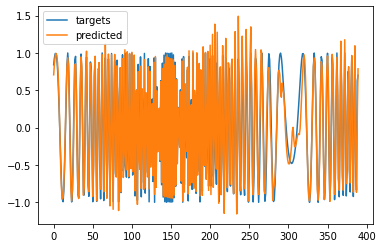

In [ ]:
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:, 0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predicted')
plt.legend()

## Multi-Step forecast

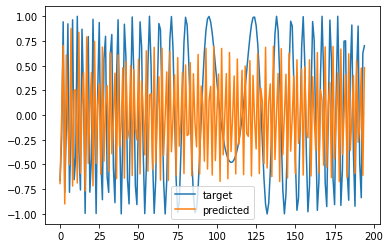

In [ ]:
forecast = []
input_ = X[-N//2]
while(len(forecast) < len(Y[-N//2:])):
  # reshape the input to NxTxD
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make new input with latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='target')
plt.plot(forecast, label='predicted')
plt.legend()